In [10]:
 
packages = c("ggplot2", "pastecs","sjmisc")

package.check <- lapply(
  packages,
  FUN = function(x) {
    if (!require(x, character.only = TRUE)) {
      #install.packages(x, dependencies = TRUE)
      print(paste("NEED to install  ",x))
      library(x, character.only = TRUE)
    }else{
       print(paste("no need to install  ",x))
 
    }
  }
)

[1] "no need to install   ggplot2"
[1] "no need to install   pastecs"
[1] "no need to install   sjmisc"


In [11]:

#write.table(iris,"iris.csv",row.names=F,col.names=F,quote=F,fileEncoding="UTF-8")
read.table("pig-ds1.csv",encoding="UTF-8")->ds1
names(ds1) <- c('colorimetry.score',  'enz.activity','fat.indice','m.quality', 'species' )
#names(ds1) <- c('Sepal.Length','Sepal.Width','Petal.Length','Petal.Width','Species')
#ds1[, paste('Here', 'my', 'column', 'name', sep = '_')] <- 'foo'

In [12]:
head(ds1)

colorimetry.score,enz.activity,fat.indice,m.quality,species
5.1,3.5,1.4,0.2,basque
4.9,3.0,1.4,0.2,basque
4.7,3.2,1.3,0.2,basque
4.6,3.1,1.5,0.2,basque
5.0,3.6,1.4,0.2,basque
5.4,3.9,1.7,0.4,basque


In [13]:
 
head(ds1)
ds1[] <- lapply(ds1, function(x) if(is.integer(x)) as.numeric(x) else x)
ds1[] <- lapply(ds1, function(x) if(is_empty(trim(x))) 'NA' else x)

 

summary_ds1 <- stat.desc(ds1)
summary_ds1
 

colorimetry.score,enz.activity,fat.indice,m.quality,species
5.1,3.5,1.4,0.2,basque
4.9,3.0,1.4,0.2,basque
4.7,3.2,1.3,0.2,basque
4.6,3.1,1.5,0.2,basque
5.0,3.6,1.4,0.2,basque
5.4,3.9,1.7,0.4,basque


,colorimetry.score,enz.activity,fat.indice,m.quality,species
nbr.val,151.00000000,151.00000000,151.0000000,151.00000000,NA
nbr.null,0.00000000,0.00000000,0.0000000,0.00000000,NA
nbr.na,0.00000000,0.00000000,0.0000000,0.00000000,NA
min,4.30000000,2.00000000,1.0000000,0.10000000,NA
max,7.90000000,4.40000000,6.9000000,2.50000000,NA
range,3.60000000,2.40000000,5.9000000,2.40000000,NA
sum,882.80000000,461.90000000,569.1000000,182.10000000,NA
median,5.80000000,3.00000000,4.4000000,1.30000000,NA
mean,5.84635762,3.05894040,3.7688742,1.20596026,NA
SE.mean,0.06723012,0.03538837,0.1435906,0.06217707,NA


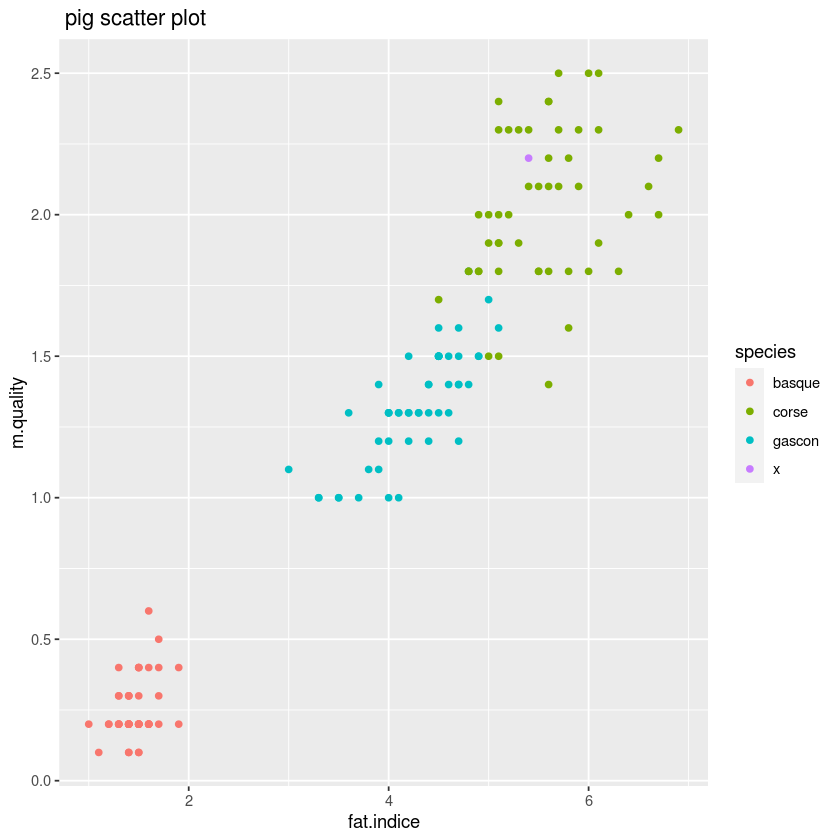

In [14]:
ggplot(ds1, aes(fat.indice,m.quality, col=species)) + geom_point() + ggtitle(" pig scatter plot")
